In [18]:
import pickle
with open("spreadsheet_boolean.pkl", "rb") as f:
    df = pickle.load(f)

C:\Users\aswan\AppData\Local\Temp\ipykernel_21020\2884683019.py:3: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pickle.load(f)


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df.set_index('date',inplace=True)

In [21]:
df.head()

,symbol,streak_len,direction,occurrence,performance,vol,ma5_pos,ma10_pos,ma20_pos,ma50_pos,ma100_pos,ma200_pos,ma5_neg,ma10_neg,ma20_neg,ma50_neg,ma100_neg,ma200_neg,next_day_actual,bin_name
date,,,,,,,,,,,,,,,,,,,,
2024-12-18,MIGI,4,-1,46,-1,1,0,0,0,0,0,0,-1,1,1,-1,-1,-1,0,4 -1 -1 -1 1 0 0 -1 -1
2024-12-18,PSNY,7,-1,8,1,1,0,0,0,0,0,0,1,1,-1,1,-1,-1,0,7 -1 1 1 1 0 0 1 -1
2024-12-18,AVNW,3,-1,536,1,1,0,0,1,0,0,0,-1,-1,0,1,1,1,0,3 -1 1 1 1 0 0 -1 1
2024-12-18,ANIP,3,-1,334,1,1,0,0,0,0,0,0,1,-1,-1,-1,1,1,0,3 -1 1 1 1 0 0 1 1
2024-12-18,GOODO,5,-1,10,1,-1,0,0,0,0,0,1,1,-1,1,-1,-1,0,0,5 -1 1 1 -1 0 1 1 0


In [22]:
print(df.shape)

(2189644, 20)


In [23]:
df.dtypes

symbol             object
streak_len         object
direction           int64
occurrence         object
performance         int64
vol                 int64
ma5_pos             int64
ma10_pos            int64
ma20_pos            int64
ma50_pos            int64
ma100_pos           int64
ma200_pos           int64
ma5_neg             int64
ma10_neg            int64
ma20_neg            int64
ma50_neg            int64
ma100_neg           int64
ma200_neg           int64
next_day_actual     int64
bin_name           object
dtype: object

In [24]:
df['streak_len'] = df['streak_len'].astype(int)
df['occurrence'] = df['occurrence'].astype(int)
df.drop(columns=['symbol','bin_name'],inplace=True)
df.head()

,streak_len,direction,occurrence,performance,vol,ma5_pos,ma10_pos,ma20_pos,ma50_pos,ma100_pos,ma200_pos,ma5_neg,ma10_neg,ma20_neg,ma50_neg,ma100_neg,ma200_neg,next_day_actual
date,,,,,,,,,,,,,,,,,,
2024-12-18,4,-1,46,-1,1,0,0,0,0,0,0,-1,1,1,-1,-1,-1,0
2024-12-18,7,-1,8,1,1,0,0,0,0,0,0,1,1,-1,1,-1,-1,0
2024-12-18,3,-1,536,1,1,0,0,1,0,0,0,-1,-1,0,1,1,1,0
2024-12-18,3,-1,334,1,1,0,0,0,0,0,0,1,-1,-1,-1,1,1,0
2024-12-18,5,-1,10,1,-1,0,0,0,0,0,1,1,-1,1,-1,-1,0,0


In [33]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1]
y = df['next_day_actual']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [34]:
print(x_train.shape)
print(x_test.shape)

(1751715, 17)
(437929, 17)


In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42) 
model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [36]:
model.score(x_train,y_train)

0.716335134425406

In [37]:
model.score(x_test,y_test)

0.47665489154634655

In [39]:
importance_df = pd.DataFrame({
    'Feature':x_train.columns, 
    'Importance':model.feature_importances_
}).sort_values('Importance', ascending=False)
importance_df

,Feature,Importance
2,occurrence,0.830873
0,streak_len,0.034541
8,ma50_pos,0.012808
9,ma100_pos,0.012031
14,ma50_neg,0.011747
15,ma100_neg,0.011618
7,ma20_pos,0.011331
13,ma20_neg,0.010095
10,ma200_pos,0.009030
16,ma200_neg,0.008881


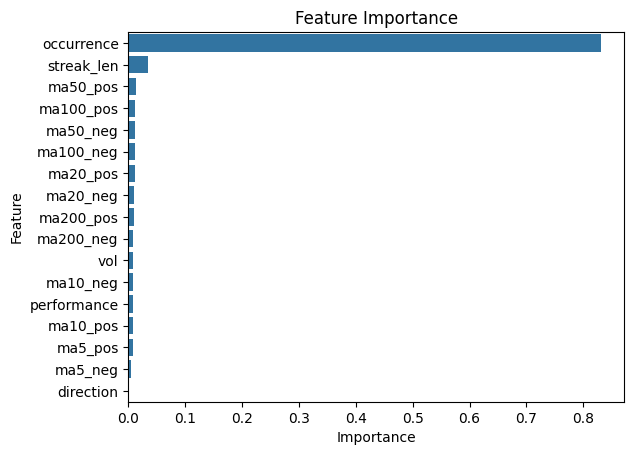

In [40]:
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='Importance', y='Feature');

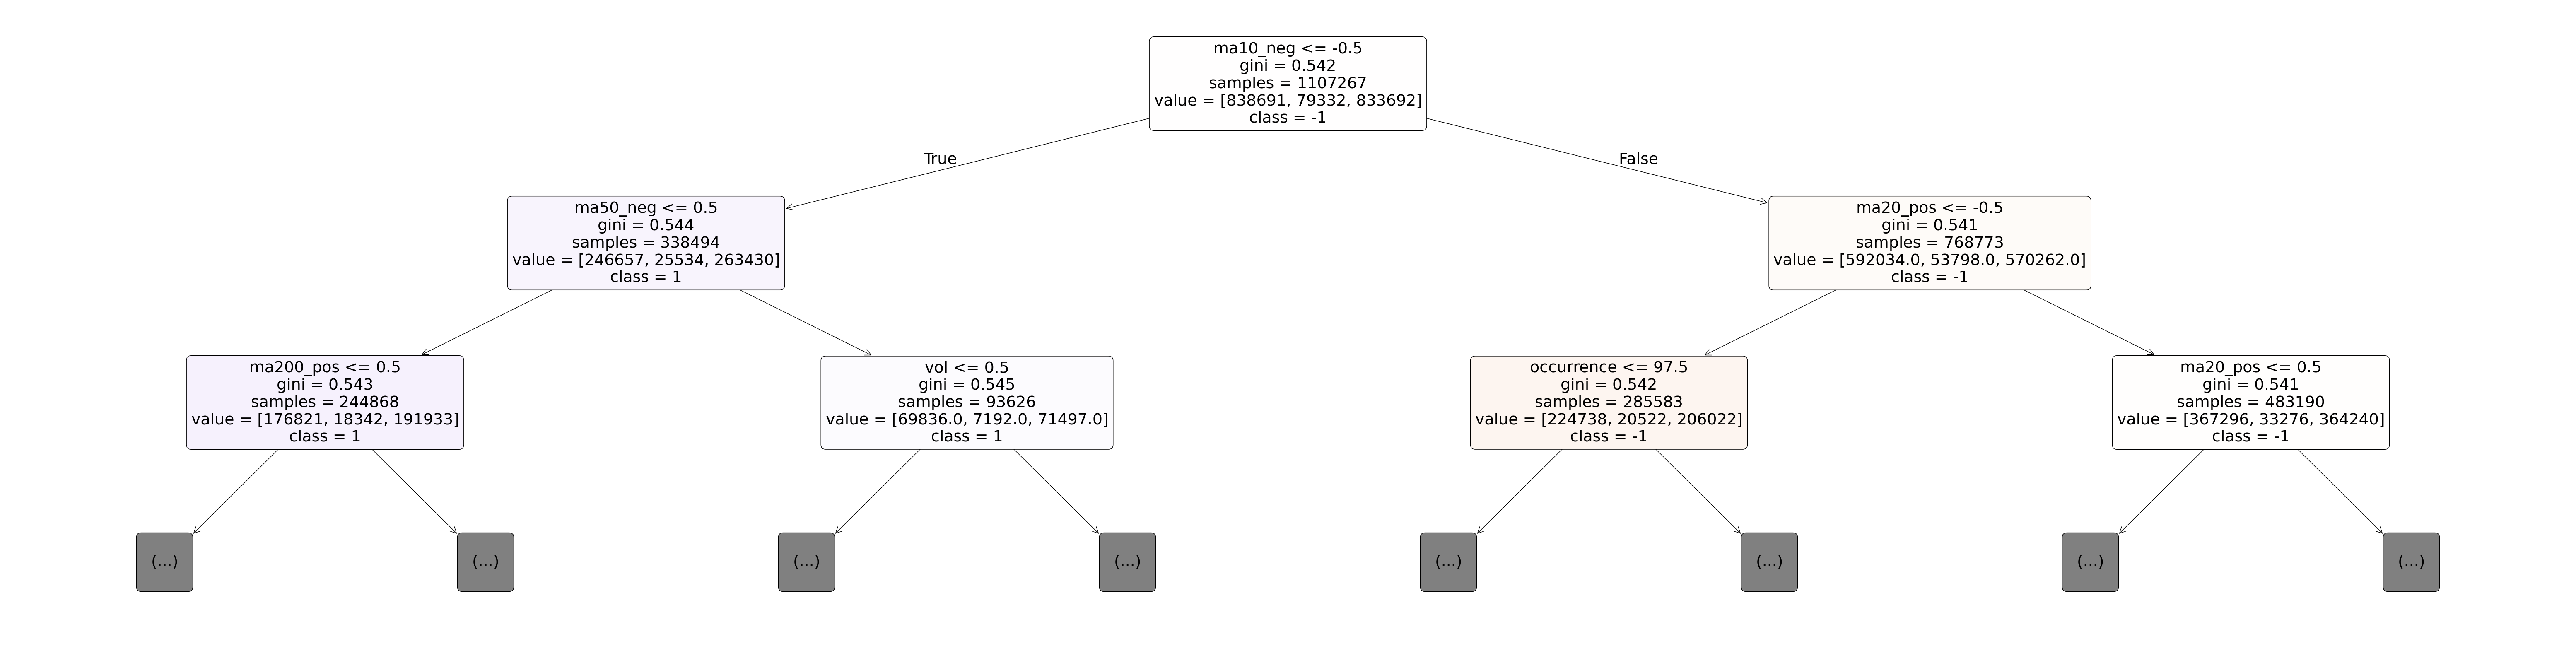

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], feature_names=x_train.columns, max_depth=2, filled=True, rounded=True, class_names=[str(cls) for cls in model.classes_]);
# model.estimator[] selects from different decision trees

In [42]:
# helper function to make it easy to test hyperparameters
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(x_train, y_train)
    return model.score(x_train, y_train), model.score(x_test, y_test)

In [43]:
test_params(max_depth=5)

(0.49466437177280553, 0.49382205791349737)

In [51]:
test_params(max_depth=12)

(0.5185837878878699, 0.4967860086909065)